# Clustering con Python

### Importando librerias
Importando las librerias necesarias para ejecutar el cluster

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

### Cargando la data

In [14]:
df = pd.read_csv("../datasets/wine/winequality-red.csv", sep=";")
df.head()
# white_wine = pd.read_csv("../datasets/wine/winequality-white.csv", sep=";")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
print(f'El tamaño del dataset es de {df.shape[0]} filas y {df.shape[1]} columnas')

El tamaño del dataset es de 1599 filas y 12 columnas


### Histograma de la calidad de los vinos

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

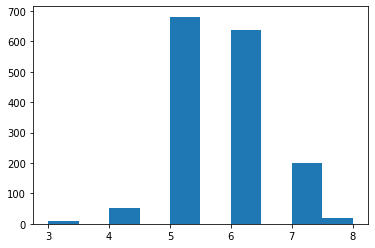

In [22]:
plt.hist(df["quality"])

### Promedio de las caracteristicas agrupadas por calidad

In [24]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Normalización de los datos
Para está normalizacion se hace uso del Escalado de variables

In [26]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clustering jerárquico con scikit-learn

In [64]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

clus = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)

(array([379.,   0., 322.,   0., 492.,   0., 158.,   0., 204.,  44.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

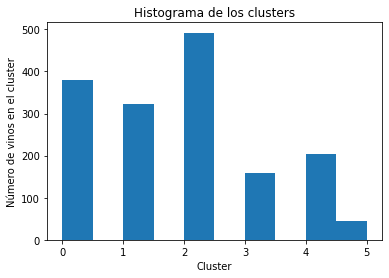

In [74]:
md_h = pd.Series(clus.labels_)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos en el cluster")
plt.hist(md_h)

In [75]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [76]:
Z = linkage(df_norm, "ward")

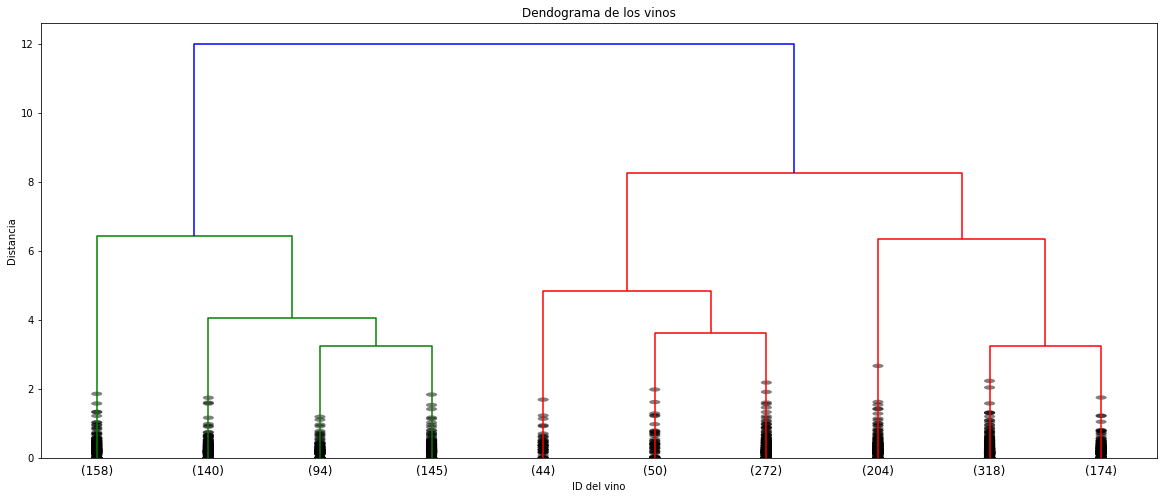

In [77]:
plt.figure(figsize=[20,8])
plt.title("Dendograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, truncate_mode="lastp", p=10, show_leaf_counts=True, show_contracted=True)
plt.show()

## K-means

In [78]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [79]:
model = KMeans(n_clusters=6).fit(df_norm)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [84]:
md_k = pd.Series(model.labels_)
md_k

0       1
1       1
2       1
3       4
4       1
       ..
1594    3
1595    3
1596    3
1597    3
1598    2
Length: 1599, dtype: int32

In [85]:
df_norm["clust_h"] = md_h
df_norm["clust_k"] = md_k
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,4
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1


(array([ 28.,   0., 514.,   0., 268.,   0., 221.,   0., 249., 319.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

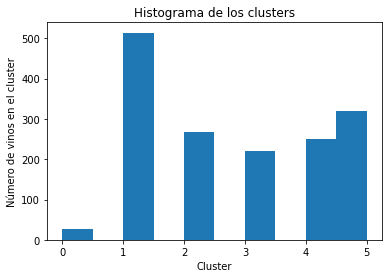

In [87]:
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos en el cluster")
plt.hist(md_k)

In [89]:
# Centroides escogidos por el modelo
model.cluster_centers_

array([[0.33249052, 0.28522505, 0.49785714, 0.07265166, 0.55008347,
        0.21780684, 0.21794548, 0.51305853, 0.23003375, 0.60179641,
        0.15549451, 0.46428571],
       [0.26323129, 0.35751692, 0.12122568, 0.09115319, 0.1235912 ,
        0.14505124, 0.10663266, 0.49020667, 0.48661111, 0.15553717,
        0.22244338, 0.44280156],
       [0.36355831, 0.1583393 , 0.42070896, 0.1040687 , 0.10544315,
        0.16113096, 0.08351353, 0.41374625, 0.42017276, 0.23737599,
        0.48266361, 0.69477612],
       [0.173147  , 0.32588483, 0.08995475, 0.09492965, 0.0951586 ,
        0.25218278, 0.1247142 , 0.32352609, 0.58096697, 0.18633322,
        0.49212206, 0.61176471],
       [0.58229378, 0.20708863, 0.5111245 , 0.13393299, 0.13145738,
        0.13886532, 0.09222757, 0.65562691, 0.33140436, 0.22364909,
        0.29179281, 0.54698795],
       [0.31675313, 0.27861038, 0.30451411, 0.15165114, 0.12697233,
        0.37884675, 0.29727395, 0.53881439, 0.43568731, 0.17842059,
        0.21377703,

In [90]:
# Coeficiente de inercia del modelo sin normalizar
model.inertia_

186.55225688012314

## Interpretación final

In [92]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.332491,0.285225,0.497857,0.072652,0.550083,0.217807,0.217945,0.513059,0.230034,0.601796,0.155495,0.464286,5.000000
1,0.263231,0.357517,0.121226,0.091153,0.123591,0.145051,0.106633,0.490207,0.486611,0.155537,0.222443,0.442802,2.011673
2,0.363558,0.158339,0.420709,0.104069,0.105443,0.161131,0.083514,0.413746,0.420173,0.237376,0.482664,0.694776,0.115672
3,0.173147,0.325885,0.089955,0.094930,0.095159,0.252183,0.124714,0.323526,0.580967,0.186333,0.492122,0.611765,3.466063
4,0.582294,0.207089,0.511124,0.133933,0.131457,0.138865,0.092228,0.655627,0.331404,0.223649,0.291793,0.546988,2.048193
5,0.316753,0.278610,0.304514,0.151651,0.126972,0.378847,0.297274,0.538814,0.435687,0.178421,0.213777,0.453918,1.050157


In [94]:
df_norm.groupby("clust_k").std()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.055314,0.098979,0.199302,0.031654,0.242514,0.101744,0.121302,0.052746,0.088239,0.199338,0.045357,0.122366,0.000000
1,0.073784,0.110268,0.103981,0.049998,0.044822,0.082336,0.075773,0.081711,0.099225,0.064328,0.085938,0.128102,0.719987
2,0.102873,0.063469,0.095697,0.070516,0.037126,0.118487,0.069087,0.105666,0.084441,0.082604,0.123475,0.134536,0.487346
3,0.073390,0.097524,0.098588,0.062292,0.030755,0.139232,0.083290,0.106196,0.106358,0.068753,0.142887,0.132277,1.154035
4,0.128181,0.083375,0.113796,0.106992,0.053969,0.098218,0.065687,0.102414,0.088775,0.088772,0.139912,0.149465,1.401931
5,0.097800,0.109276,0.128964,0.154633,0.042661,0.147988,0.116069,0.109778,0.086272,0.083764,0.092642,0.111488,0.642317


(array([11., 31., 47., 42., 26., 15., 15., 22.,  6.,  6.]),
 array([0.24615385, 0.30769231, 0.36923077, 0.43076923, 0.49230769,
        0.55384615, 0.61538462, 0.67692308, 0.73846154, 0.8       ,
        0.86153846]),
 <a list of 10 Patch objects>)

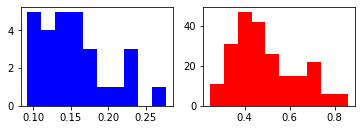

In [119]:
df_1 = df_norm[df_norm["clust_k"] == 0]
plt.subplot(221)
plt.hist(df_1["alcohol"], color ='b')
plt.subplot(222)
df_2 = df_norm[df_norm["clust_k"] == 3]
plt.hist(df_2["alcohol"], color='r')